Fashion MNIST Data Classification Project

**DHAIRYA SAATOLIYA**


#Import Libraries

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
#This PROJECT IS SUBMITTED BY DHAIRYA SAATOLIYA AS AN INTERNSHIP PROJECT IN ARTIFICAIAL INTELLIGENCE WITH PYTHON - MICROSOFT

#Loading data

In [ ]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print the shape of data

In [ ]:
X_train.shape,y_train.shape, "\n" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '\n', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

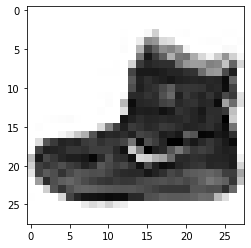

In [ ]:
plt.imshow(X_train[0],cmap='Greys')

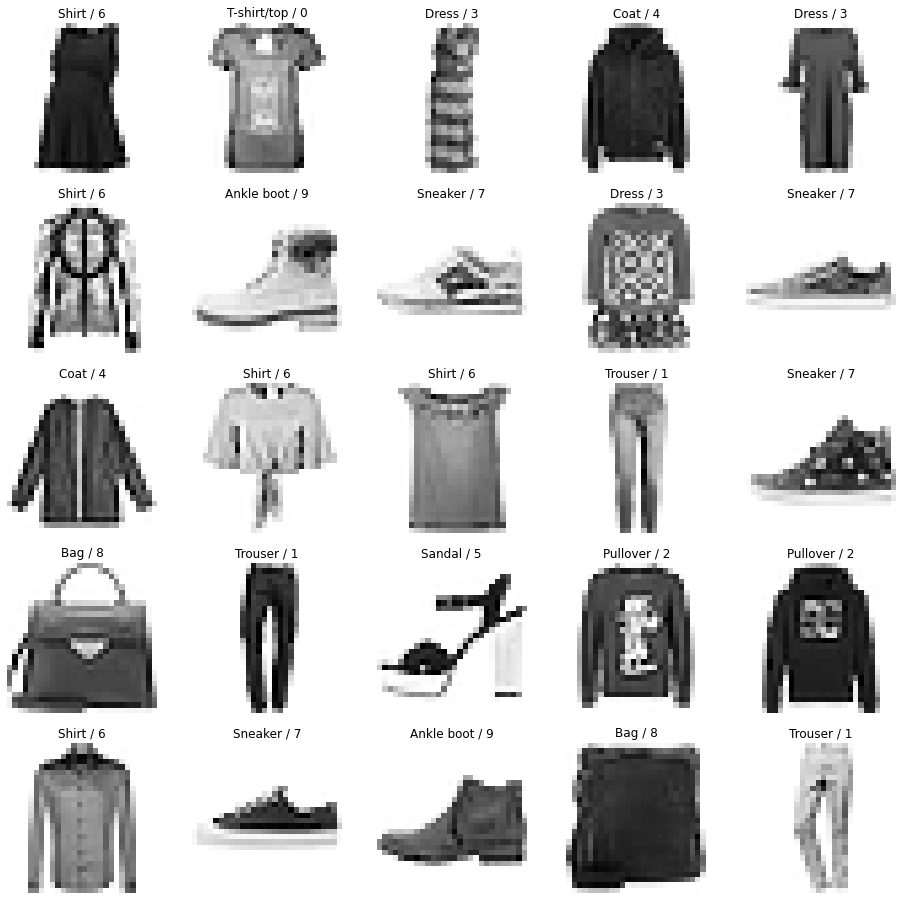

In [ ]:
plt.figure(figsize=(16,16))
j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim

4

In [ ]:
X_test=np.expand_dims(X_test,-1)

In [ ]:
# feature scaling

In [ ]:
X_train = X_train/255
X_test= X_test/255

In [ ]:
# Split dataset

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

# Buiding the CNN model

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 34s 353ms/step - loss: 0.6451 - accuracy: 0.7837 - val_loss: 0.4407 - val_accuracy: 0.8472
Epoch 2/10
94/94 [==============================] - 26s 280ms/step - loss: 0.3814 - accuracy: 0.8674 - val_loss: 0.3753 - val_accuracy: 0.8684
Epoch 3/10
94/94 [==============================] - 22s 235ms/step - loss: 0.3294 - accuracy: 0.8842 - val_loss: 0.3316 - val_accuracy: 0.8844
Epoch 4/10
94/94 [==============================] - 22s 236ms/step - loss: 0.2998 - accuracy: 0.8949 - val_loss: 0.3082 - val_accuracy: 0.8934
Epoch 5/10
94/94 [==============================] - 22s 236ms/step - loss: 0.2781 - accuracy: 0.9030 - val_loss: 0.2952 - val_accuracy: 0.8988
Epoch 6/10
94/94 [==============================] - 24s 259ms/step - loss: 0.2619 - accuracy: 0.9063 - val_loss: 0.2894 - val_accuracy: 0.8978
Epoch 7/10
94/94 [==============================] - 22s 235ms/step - loss: 0.2444 - accuracy: 0.9119 - val_loss: 0.2929 - val_accuracy: 0.8962

In [ ]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 3s 9ms/step


array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.34, 0.05, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2756 - accuracy: 0.8970


[0.27559342980384827, 0.8970000147819519]

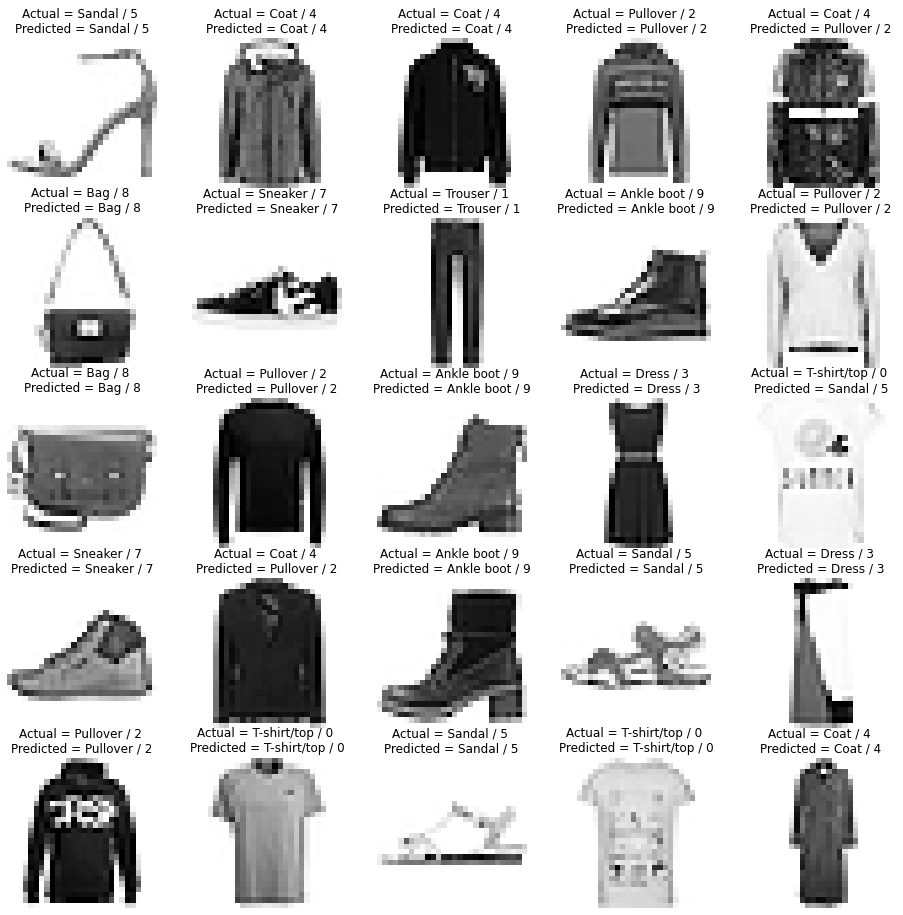

In [ ]:
plt.figure(figsize=(16,16)) 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

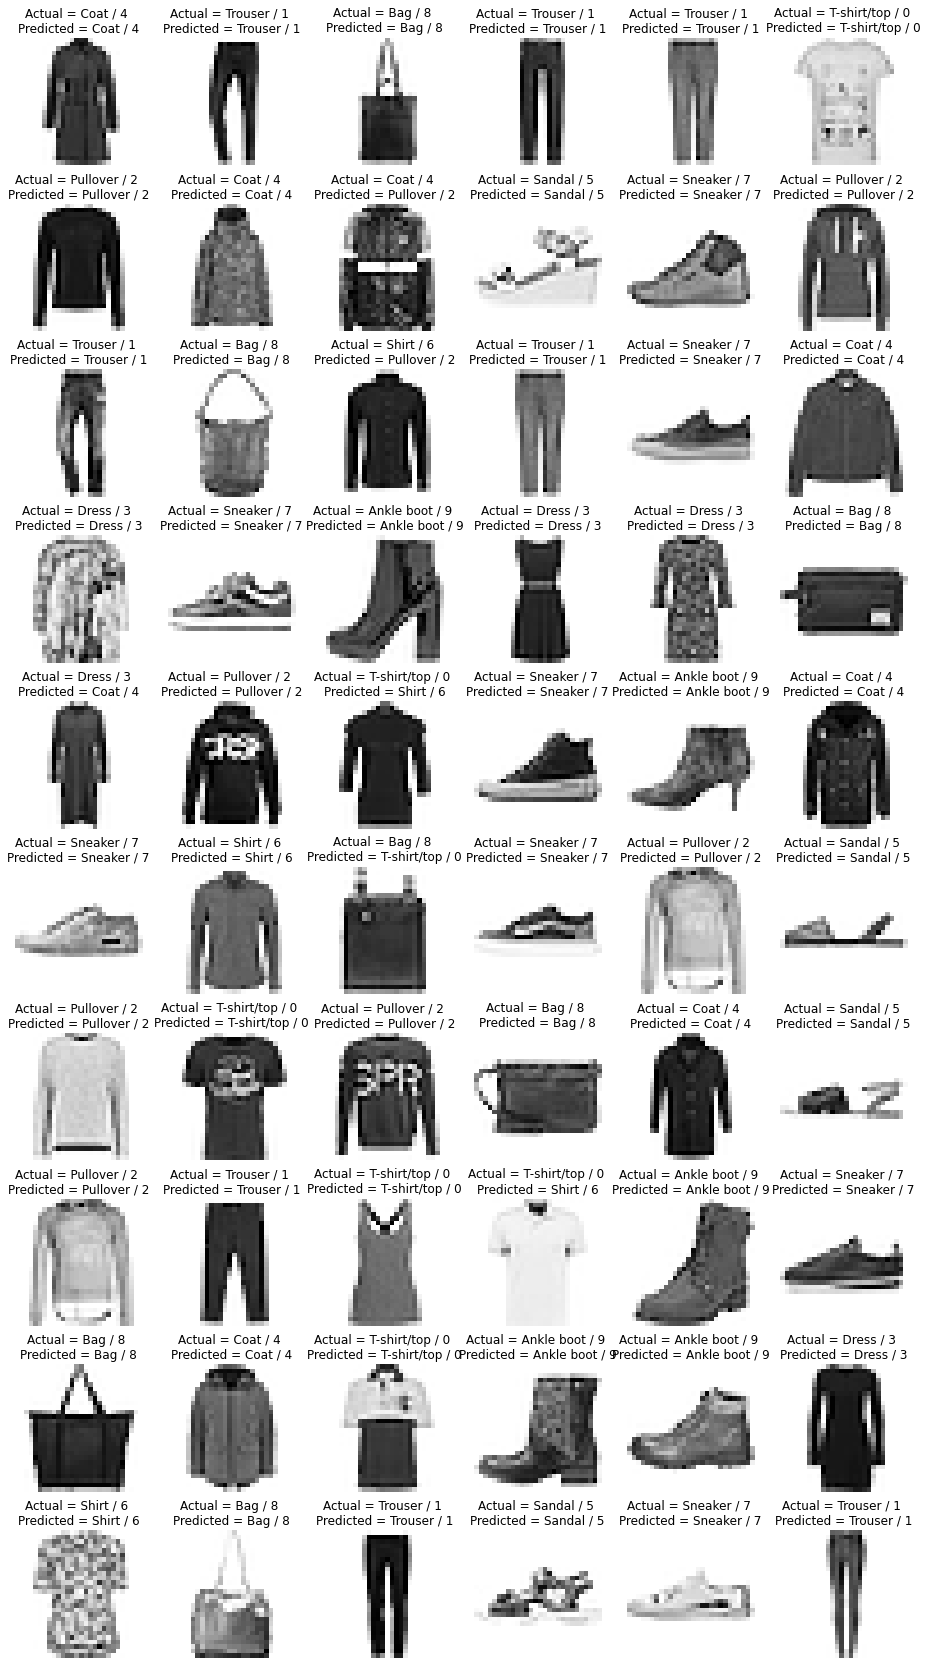

In [ ]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.87      0.83      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.88      0.78      0.82      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.71      0.73      0.72      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



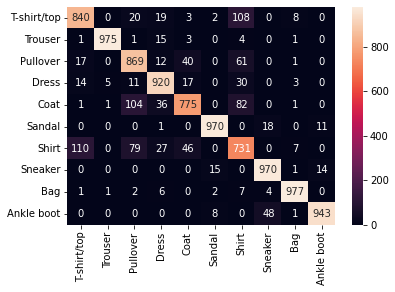

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [ ]:
model.save('fashion_mnist_cnn_model.h5')